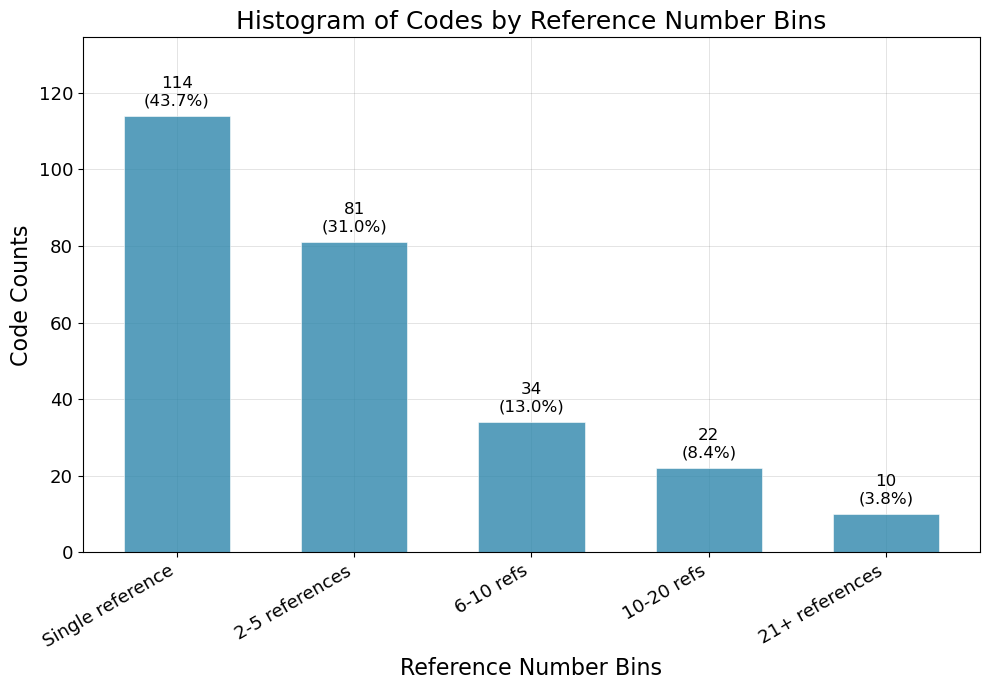

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file (replace with your actual file path if needed)
df = pd.read_csv('HistogramReferences.csv')

# Convert 'Reference Number' to numeric (in case there are any non-numeric values)
df['Reference Number'] = pd.to_numeric(df['Reference Number'], errors='coerce')

# Define bins and labels
bins = [0, 1, 5, 10, 20, float('inf')]
labels = ['Single reference', '2-5 references', '6-10 refs', '10-20 refs', '21+ references']

# Bin the data
df['Bin'] = pd.cut(df['Reference Number'], bins=bins, labels=labels, right=True)

# Count codes in each bin
bin_counts = df['Bin'].value_counts().sort_index()
total_codes = bin_counts.sum()
percentages = bin_counts / total_codes * 100

# Plot setup
plt.figure(figsize=(10, 7))
# bars = plt.bar(bin_counts.index, bin_counts.values, color='skyblue')
bars = plt.bar(bin_counts.index, bin_counts.values, width=0.6, color='#2E86AB', edgecolor='white', linewidth=0.5, alpha=0.8)

# Add counts and percentages above each bar
for i, (count, pct) in enumerate(zip(bin_counts.values, percentages)):
    plt.text(i, count + 2, f"{count}\n({pct:.1f}%)", ha='center', va='bottom', fontsize=12)

plt.xlabel('Reference Number Bins', fontsize=16)
plt.ylabel('Code Counts', fontsize=16)
plt.title('Histogram of Codes by Reference Number Bins', fontsize=18)
plt.xticks(rotation=30, ha='right', fontsize=13)
plt.yticks(fontsize=13)

# plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.6)
# plt.gca().set_facecolor('white')
plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.5, color='gray')
plt.gca().set_axisbelow(True)  

plt.ylim(0, bin_counts.max() * 1.18) 
plt.tight_layout()
# plt.savefig('fig2_professional.pdf', dpi=600, bbox_inches='tight')
plt.savefig('figure2.tif', dpi=300, bbox_inches='tight')
plt.show()
